# Module 2: Data Analysis

## Sprint 3: Statistical Modeling

## Part 5: Red Wine Quality

## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyse the Red Wine Quality dataset.
You will have to apply all that you have learned about Machine Learning to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice creating dashboards with Google Data Studio.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
- Load the data using Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

During a correction, you may get asked questions that test your understanding of covered topics.

- What is multicollinearity? Can you give an example? Why is it important to avoid multicollinearity in linear models?
- What is a confounding variable? Can you give an example?
- What is overfitting? How to detect and reduce overfitting?
- What is the Bayes Theorem? How can we use the Bayes Theorem to estimate the probability of our hypotheses?
- What metrics are typically used for evaluating classification models? What are their use cases?


# Red Wine Quality Dataset Analysis

**About Dataset**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

**Content**

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1) fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2) volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3) citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines.

4) residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5) chlorides - the amount of salt in the wine.

6) free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

7) total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8) density - the density of water is close to that of water depending on the percent alcohol and sugar content.

9) pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

10) sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

11) alcohol

Output variable (based on sensory data):

12) quality (score between 0 and 10)

**Objectives for the analysis**

To find out how well we can predict quality or alcohol outcome variables using other variables as predictor variables and how useful they are. Also test different hypothesis regarding whether the quality of different wine groups differs.

## Data cleaning and exploration

In [1]:
try:
  import duckdb
except ImportError:
  !pip install duckdb
  !pip install matplotlib==3.4.0

  import os
  os.kill(os.getpid(), 9)

In [2]:
!gdown 1UxIGKci3dxP_hzrQkoQ75fKAvjOAgqz7

Downloading...
From: https://drive.google.com/uc?id=1UxIGKci3dxP_hzrQkoQ75fKAvjOAgqz7
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 45.3MB/s]


In [3]:
!gdown 1YZdnvmdjbpt5uoi4vOjb7VXuRrbqszw9

Downloading...
From: https://drive.google.com/uc?id=1YZdnvmdjbpt5uoi4vOjb7VXuRrbqszw9
To: /content/eda_utils.py
100% 7.14k/7.14k [00:00<00:00, 7.35MB/s]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [5]:
wine_df = pd.read_csv('winequality-red.csv')

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_df.duplicated().sum()

240

There are quite a lot of duplicate values, so let's check how much of those values are duplicated.

In [10]:
wine_df[wine_df.duplicated()].duplicated().sum()

20

Not a whole lot, so let's just assume that it is reasonable to have cases where 2 or 3 wines have exactly the same variable values.

Let's check if there are outliers or anomalious values in the dataset by investigating the summary statistics, distributions and boxplots.

In [11]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From these summary statistics we can see there are cases where the mean deviates from the median quite a bit like residual sugar, chlorides, free sulfur dioxide. Before we investigate the dataset further let's convert the quality variable to a binary categorical variable to represent a bad wine (quality <= 5.5) and good wine (quality > 5.5).

In [12]:
wine_df_original = wine_df.copy()

wine_df['quality'] = wine_df['quality'].apply(
    lambda x: 1 if x > 5.5 else 0
)

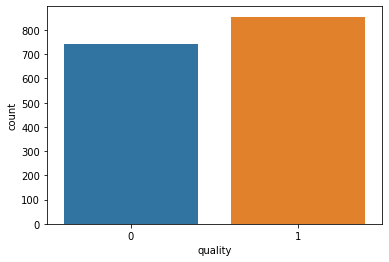

In [13]:
sns.countplot(
    data=wine_df,
    x='quality'
)

plt.show()

We can see that the quality variable is quite balanced with regard to number of values in each category.

## Variability of data variables

In [14]:
from eda_utils import multi_plots

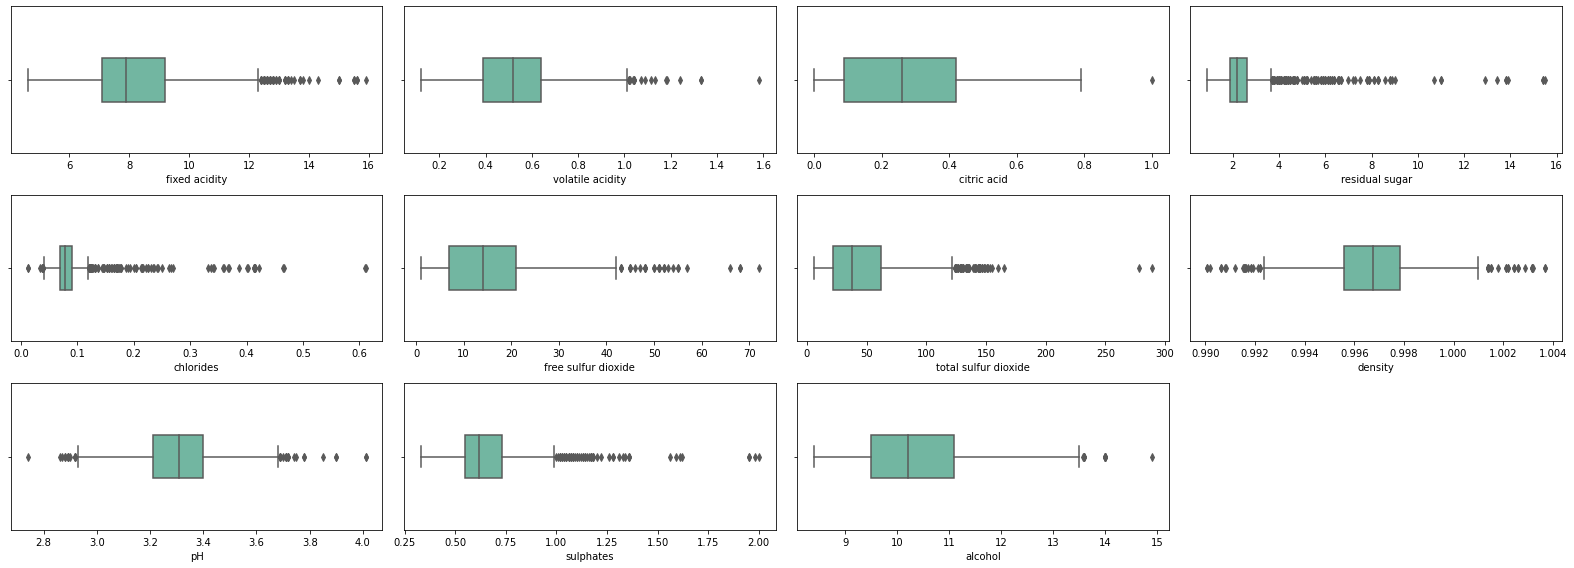

In [15]:
plot_info = {}
plot_info['plot_kinds'] = ['box']
plot_info['plot_x'] = list(wine_df.columns)
plot_info['plot_y'] = []
plot_info['plot_hue'] = ['quality']
plot_info['plot_kwargs'] = [{'width':0.3}]

multi_plots(
    wine_df,
    plot_info,
    n_rows=3,
    n_cols=4,
    size=(22,8),
    n_plots=11
)

We can see that all columns have a fair share of outliers. But some of the columns have a lot of outliers and most of the data is concentrated on a narrow range like in 'residual sugar', 'chlorides', 'sulphates' columns. Let's see how much outliers each column has.

In [16]:
from typing import Tuple

def iqr_lower_upper_bounds(
    series: pd.Series
  ) -> Tuple[float, float]:
  Q3 = series.quantile(0.75)
  Q1 = series.quantile(0.25)
  IQR = Q3 - Q1

  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR

  return (
      lower_range,
      upper_range
  )

In [17]:
outlier_counts = []

for col in wine_df.columns:
  bounds = iqr_lower_upper_bounds(wine_df[col])
  lower_range = bounds[0]
  upper_range = bounds[1]

  outlier_counts.append(
      ((wine_df[col] < lower_range) | (wine_df[col] > upper_range)).sum()
  )

outlier_counts_series = pd.Series(
    index=wine_df.columns,
    data=outlier_counts
).sort_values(ascending=False)

outlier_counts_series

residual sugar          155
chlorides               112
sulphates                59
total sulfur dioxide     55
fixed acidity            49
density                  45
pH                       35
free sulfur dioxide      30
volatile acidity         19
alcohol                  13
citric acid               1
quality                   0
dtype: int64

In [18]:
n_outliers = outlier_counts_series.sum()
outlier_perc = 100 * n_outliers / wine_df.shape[0]
print(f'Number of outliers: {n_outliers}, their percentage: {outlier_perc}')

Number of outliers: 573, their percentage: 35.834896810506564


The number of outliers is quite high which is 35.8% of an entire dataset. We will see later on if these outliers have an effect on the regression.

Let's now observe the distributions and correlations of the data.

## Distributions and correlation of data variables

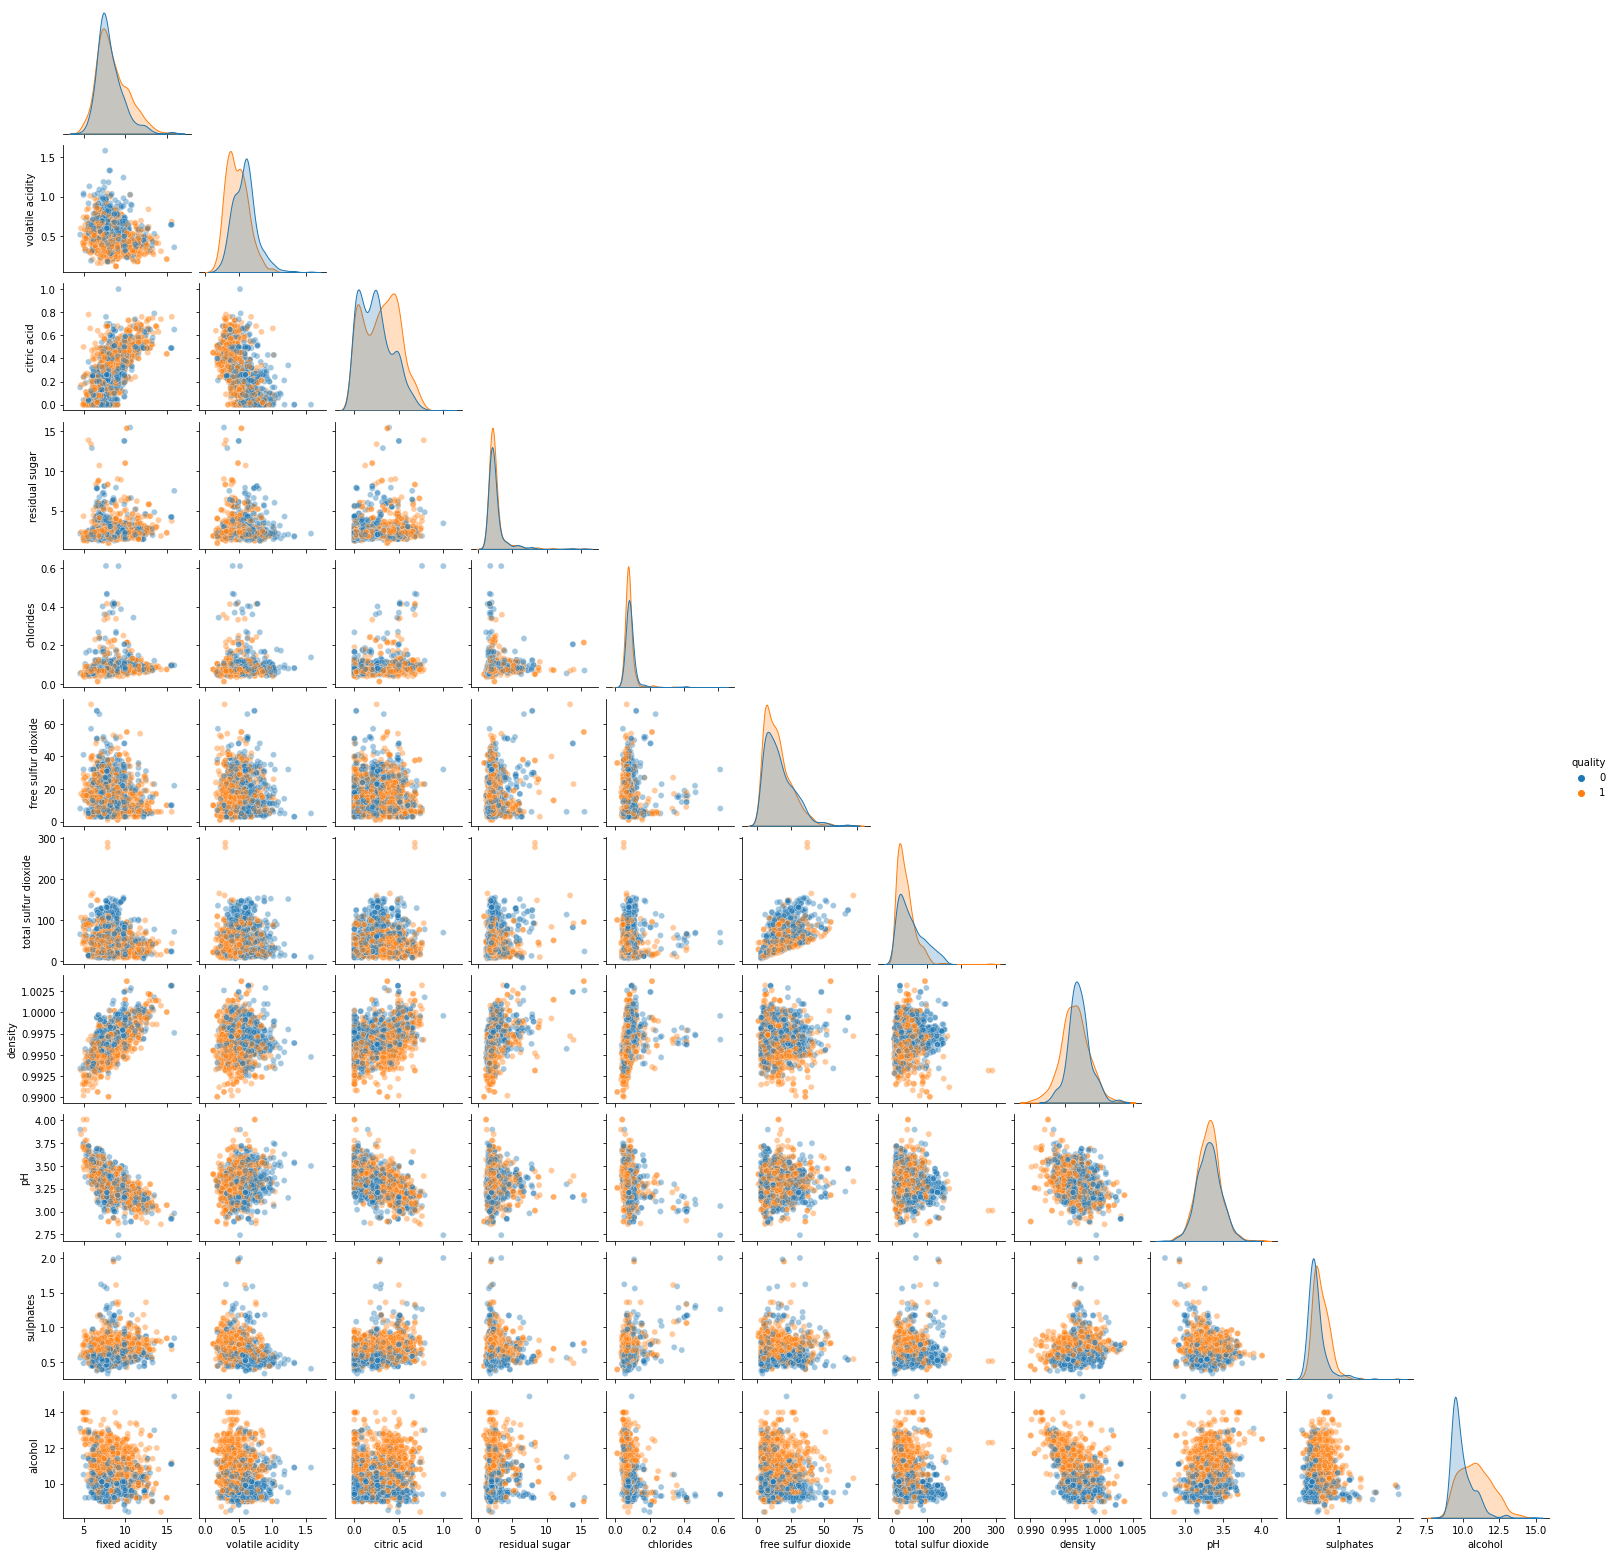

In [19]:
sns.pairplot(
    wine_df,
    hue='quality',
    corner=True,
    height=2,
    plot_kws={'alpha':0.4},
)

plt.show()

We can see that overall the distributions of good and bad wine doesn't seem to differ very much across most of the variables. Although there are a few combinations of variables where good and bad wines seem to be somewhat separated. The formations of scatter plots indicate the degrees of linear correlations. For example the most correlated variables with alcohol seem to be fixed acidity, density which has some negative correlation and pH which has some positive correlation.

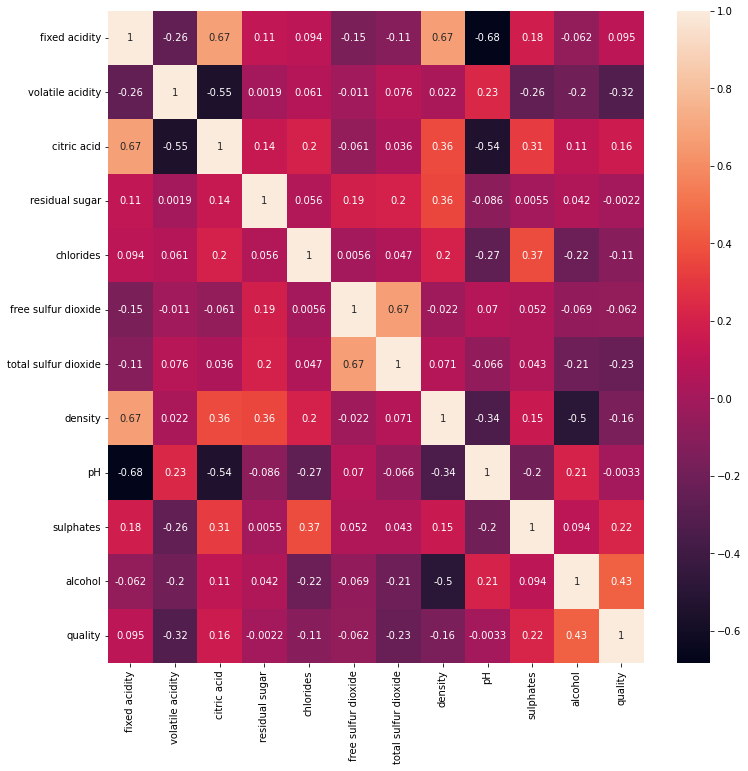

In [20]:
plt.figure(figsize=(12,12))

corr = wine_df.corr()

sns.heatmap(
    corr,
    annot=True
)

plt.show()

From the correlation matrix we can see which variables have the strongest correlations with variables alcohol and quality. Density variable has the strongest negative and quality has the strongest positive correlation with alcohol. While volatile acidity variable has the strongest negative and alcohol variable has the strongest positive correlation with quality.

## Link to Google Data Studio report

https://datastudio.google.com/reporting/9cdf4d64-4375-46f9-9a8e-2fcc12c58748

## Difference in quality with different concentration in alcohol hypothesis testing

It would be interesting to see if red wine quality differs with higher or lower concentration of alcohol, so let's test this hypothesis.

Our population in this case would be red wine in general and the hypothesis would be as follows:

- H0: (mean quality of red wine with alcohol concentration of <10) == (mean quality of red wine with alcohol concentration of >=10);
- Ha: (mean quality of red wine with alcohol concentration of <10) < (mean quality of red wine with alcohol concentration of >=10);

We would set our significance level to 95%

Let's first filter the required data

In [21]:
lower_alc = wine_df_original[wine_df_original['alcohol']<10]['quality']
higher_alc = wine_df_original[wine_df_original['alcohol']>=10]['quality']

In [22]:
lower_alc.shape

(680,)

In [23]:
higher_alc.shape

(919,)

The number of samples differs in both groups so let's resample higher_alc so both of them would have the same sample size.

In [24]:
higher_alc = higher_alc.sample(
    lower_alc.shape[0],
    random_state=0
)

In [25]:
lower_alc.mean()

5.266176470588236

In [26]:
higher_alc.mean()

5.883823529411765

Let's now perform a one-sided z-test to see if there is any significant difference.

In [27]:
import statsmodels.stats.weightstats as sm

In [28]:
lower_alc.std()

0.6004687158209987

In [29]:
higher_alc.std()

0.8229245405537202

In [30]:
d1 = sm.DescrStatsW(lower_alc)
d2 = sm.DescrStatsW(higher_alc)
    
cm_obj = sm.CompareMeans(d1, d2)

zstat, pvalue = cm_obj.ztest_ind(
    alternative='smaller',
    usevar='unequal',
    value=0
)

print(f'Test statistic: {zstat.round(3)}, pvalue: {pvalue.round(3)}\n')
if pvalue < 0.05:
  print('pvalue is less than 0.05 we can reject the null hypothesis')
else:
  print('pvalue is more than 0.05 we can not reject the null hypothesis')

Test statistic: -15.81, pvalue: 0.0

pvalue is less than 0.05 we can reject the null hypothesis


## Prediction of red wine quality and alcohol

Now we will investigate how well we can predict quality and alcohol variables and see how they are related to their independent variables. First we will start with quality.

In [32]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix,\
 mean_absolute_error, mean_squared_error, r2_score, roc_auc_score,\
 roc_curve

In [33]:
train, test = train_test_split(
    wine_df,
    test_size=0.2,
    random_state=0
)

### Prediction of quality

#### Regression analysis

In [34]:
predictors = list(wine_df.columns[wine_df.columns!='quality'])
outcome = 'quality'

In [35]:
lm = sm.Logit(
    train[outcome],
    sm.add_constant(train[predictors])
)

res = lm.fit()

res.summary2()

Optimization terminated successfully.
         Current function value: 0.520224
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.247     
Dependent Variable:    quality            AIC:                1354.7318 
Date:                  2022-11-06 11:35   BIC:                1416.5778 
No. Observations:      1279               Log-Likelihood:     -665.37   
Df Model:              11                 LL-Null:            -883.57   
Df Residuals:          1267               LLR p-value:        1.1181e-86
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
const                 59.0015  87.8048  0.6720 0.5016 -113.0926 231.0957
fixed acidity          0.1523   0.1091  1.3959 0.1627   -0.0616   0.3663
volatile acidity      -3.2077   0.5320 -6.0292 0.0000   -4.2505  -2.1650
citric acid           -1.2885   0.6219 -2.0719 0.0383   -2.5074  -0.0696
residual sugar         0.0873   0.0589  1.4814 0.1385   -0.0282   0.2028
chlorides             -4.1606   1.7349 -2.3982 0.0165   -7.5610  -0.7603
free sulfur dioxide    0.0155   0.0091  1.7063 0.0880   -0.0023   0.0334
total sulfur dioxide  -0.0153   0.0031 -4.9302 0.0000   -0.0214  -0.0092
density              -67.3164  89.6555 -0.7508 0.4528 -243.0380 108.4053
pH                    -0.2834   0.7988 -0.3548 0.7228   -1.8489   1.2822
sulphates              2.8957   0.4992  5.8004 0.0000    1.9173   3.8742
alcohol                0.8408   0.1149  7.3152 0.0000    0.6156   1.0661
========================================================================

"""

By training with statsmodels logistic regression we can get a lot of useful information about the trained model like the Akaike Information Criterion (AIC), pseudo R^2, the computed coefficients of our model and pvalues. We can try to decrease the AIC by removing statisticaly insignificant variables.

In [36]:
def remove_insignificant(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    alpha: float=0.05,
    model_type: str='lin_reg'
  ) -> list:
  if model_type=='log_reg':
    lm = sm.Logit(y_train, X_train)
  else:
    lm = sm.OLS(y_train, X_train)
  res = lm.fit()

  max_pvalue = res.pvalues.max()

  if max_pvalue > alpha:
    idx = res.pvalues[res.pvalues==max_pvalue].index[0]

    X_train.drop(
      columns=idx,
      inplace=True
    )

    remove_insignificant(
        X_train,
        y_train,
        alpha,
        model_type
    )
  else:
    print(res.summary2())

  return list(X_train.columns)

In [37]:
significant_columns = remove_insignificant(
    sm.add_constant(train[predictors]),
    train[outcome],
    alpha=0.05,
    model_type='log_reg'
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.520224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.520273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.520688
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521409
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522724
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.243     
Dependent Variable:   quality           AIC:               1353.1278 
Date:                 2022-11-06 11:35  BIC:               1394.3585 
No. Observations:     1279              Log-Likelihood:    -668.56   
Df Model:             7                 LL-Null:           -883.57   
Df Residuals:         1271              LLR p-value:       8.6481e-89
Converged:            1.0000

Although 3 variables were removed the results didn't change let's try addind non linear terms.

In [38]:
lm = sm.Logit(
    train[outcome],
    sm.add_constant(train[predictors])
)

res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.520224
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
import statsmodels.formula.api as smf

In [40]:
formula = "quality~ Q('volatile acidity') + Q('citric acid') + Q('free sulfur dioxide')" +\
"+ Q('total sulfur dioxide') + sulphates + I(Q('residual sugar')**2) + I(chlorides**2)" +\
"+ I(Q('free sulfur dioxide')**2) + I(pH**2) + I(sulphates**2) + I(alcohol**2)"

In [41]:
lm = smf.logit(
    formula=formula,
    data=train
)

res = lm.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.509917
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.262     
Dependent Variable:       quality               AIC:                   1328.3671 
Date:                     2022-11-06 11:35      BIC:                   1390.2131 
No. Observations:         1279                  Log-Likelihood:        -652.18   
Df Model:                 11                    LL-Null:               -883.57   
Df Residuals:             1267                  LLR p-value:           2.7390e-92
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           6.0000                                                 
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                        -4.0000   1.1102 -3.6030 0.0003  -6.1759 -1.8241
Q('volatile acidity')            -2.9996   0.5157 -5.8169 0.0000  -4.0103 -1.9889
Q('citric acid')                 -1.2594   0.5219 -2.4131 0.0158  -2.2823 -0.2365
Q('free sulfur dioxide')          0.0623   0.0240  2.5981 0.0094   0.0153  0.1093
Q('total sulfur dioxide')        -0.0164   0.0031 -5.2957 0.0000  -0.0225 -0.0103
sulphates                         9.4469   1.6523  5.7176 0.0000   6.2086 12.6853
I(Q('residual sugar') ** 2)       0.0084   0.0040  2.1244 0.0336   0.0007  0.0162
I(chlorides ** 2)                -9.1095   3.7569 -2.4247 0.0153 -16.4729 -1.7461
I(Q('free sulfur dioxide') ** 2) -0.0011   0.0005 -2.1911 0.0284  -0.0020 -0.0001
I(pH ** 2)                       -0.2622   0.0841 -3.1168 0.0018  -0.4271 -0.0973
I(sulphates ** 2)                -3.7157   0.8961 -4.1466 0.0000  -5.4720 -1.9594
I(alcohol ** 2)                   0.0433   0.0039 10.9569 0.0000   0.0355  0.0510
=================================================================================

"""

After addind squared terms and removing insignificant variables we were able to slightly reduce AIC and slightly increase pseudo R^2.

#### Model evaluation

Let's run cross validation on our best model and test it with testing data.

In [42]:
for col in train.columns:
  train[f'{col} sq'] = train[col]**2

for col in test.columns:
  test[f'{col} sq'] = test[col]**2

In [43]:
significant_columns = [
    'volatile acidity',
    'citric acid',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates',
    'residual sugar sq',
    'chlorides sq',
    'free sulfur dioxide sq',
    'pH sq',
    'sulphates sq',
    'alcohol sq',
]

In [44]:
X_train = train[significant_columns]
y_train = train[outcome]

log_reg_model = LogisticRegression(
    solver='liblinear',
    random_state=0
)

log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
scores = cross_validate(
    log_reg_model,
    X_train,
    y_train,
    cv=6,
    scoring=(
        'f1',
        'precision',
        'recall',
        'accuracy',
        'roc_auc'
      )
)

In [46]:
print(f"Cross-Validation Accuracy - Mean: {scores['test_accuracy'].mean().round(3)},\
 Std. Deviation: {scores['test_accuracy'].std().round(3)}\n\
Cross-Validation Precision - Mean: {scores['test_precision'].mean().round(3)},\
 Std. Deviation: {scores['test_precision'].std().round(3)}\n\
Cross-Validation Recall - Mean: {scores['test_recall'].mean().round(3)},\
 Std. Deviation: {scores['test_recall'].std().round(3)}\n\
Cross-Validation F1 - Mean: {scores['test_f1'].mean().round(3)},\
 Std. Deviation: {scores['test_f1'].std().round(3)}\n\
Cross-Validation AUC - Mean: {scores['test_roc_auc'].mean().round(3)},\
 Std. Deviation: {scores['test_roc_auc'].std().round(3)}")

Cross-Validation Accuracy - Mean: 0.744, Std. Deviation: 0.012
Cross-Validation Precision - Mean: 0.762, Std. Deviation: 0.02
Cross-Validation Recall - Mean: 0.758, Std. Deviation: 0.016
Cross-Validation F1 - Mean: 0.76, Std. Deviation: 0.009
Cross-Validation AUC - Mean: 0.815, Std. Deviation: 0.018


In [47]:
y_pred = log_reg_model.predict(test[significant_columns])

print(classification_report(
    test[outcome],
    y_pred
))

auc = roc_auc_score(
    test[outcome],
    y_pred
).round(3)

print(f'AUC - {auc}')

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       148
           1       0.77      0.78      0.77       172

    accuracy                           0.76       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320

AUC - 0.754


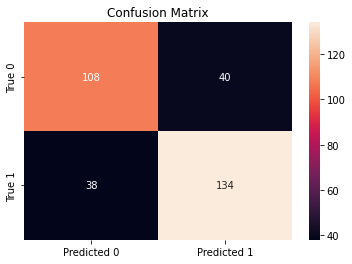

In [48]:
ax = sns.heatmap(
    confusion_matrix(
        test[outcome],
        y_pred
    ),
    annot=True,
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['True 0', 'True 1'],
    fmt=''
)

ax.set_title('Confusion Matrix')
plt.show()

In [49]:
y_score = log_reg_model.decision_function(test[significant_columns])

fpr, tpr, thresholds = roc_curve(test[outcome], y_score)

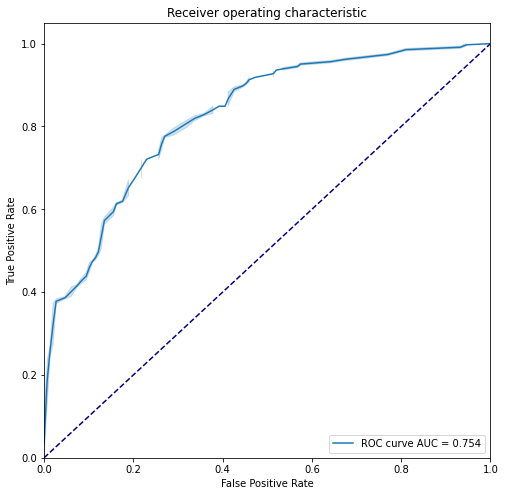

In [50]:
plt.figure(figsize=(8,8))

sns.lineplot(
    x=fpr,
    y=tpr,
    label=f"ROC curve AUC = {auc}"
)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

We can see that the computed metrics of cross validation and test set are similar so there is no overfitting, but there might some underfitting which might be reduced by colloeting more data and/or using a more complex model like random forest.

### Prediction of alcohol

We will now inspect how well we can predict alcohol variable given the rest variables as predictor variables.

#### Regression analysis

In [51]:
predictors = list(wine_df.columns[wine_df.columns!='alcohol'])
outcome = 'alcohol'

In [52]:
lm = sm.OLS(
    train[outcome],
    sm.add_constant(train[predictors])
)

res = lm.fit()

res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     240.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.28e-300
Time:                        11:35:13   Log-Likelihood:                -1169.8
No. Observations:                1279   AIC:                             2364.
Df Residuals:                    1267   BIC:                             2425.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  576.4514     14.978     38.487      0.000     547.067     605.835
fixed acidity            0.4945      0.023     21.348      0.000       0.449       0.540
volatile acidity         0.5676      0.124      4.569      0.000       0.324       0.811
citric acid              0.8413      0.151      5.560      0.000       0.544       1.138
residual sugar           0.2629      0.014     19.370      0.000       0.236       0.290
chlorides               -1.0138      0.431     -2.351      0.019      -1.860      -0.168
free sulfur dioxide     -0.0047      0.002     -2.097      0.036      -0.009      -0.000
total sulfur dioxide    -0.0008      0.001     -1.048      0.295      -0.002       0.001
density               -585.8218     15.366    -38.123      0.000    -615.968    -555.675
pH                       3.5924      0.172     20.836      0.000       3.254       3.931
sulphates                1.0739      0.114      9.403      0.000       0.850       1.298
quality                  0.3081      0.039      7.803      0.000       0.231       0.386
==============================================================================
Omnibus:                       54.594   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.640
Skew:                           0.363   Prob(JB):                     2.53e-19
Kurtosis:                       4.039   Cond. No.                     7.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this information we are mostly interested in R^2, AIC (Akaike Information Criterion), estimated coefficients for each variables and pvalues. R^2 of 0.676 tells us that the model explains 67.6% of variance. The density variable has a large coefficient which indicates it has the most weight in predicting alcohol variable. AIC should be reduced by reducing the number of variables used, so let's try doing a backward selection and remove statisticaly insignificant variables.

In [53]:
significant_columns = remove_insignificant(
    sm.add_constant(train[predictors]),
    train[outcome],
    alpha=0.05,
    model_type='lin_reg'
)

significant_columns.remove('const')

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.673    
Dependent Variable:     alcohol            AIC:                  2362.7160
Date:                   2022-11-06 11:35   BIC:                  2419.4082
No. Observations:       1279               Log-Likelihood:       -1170.4  
Df Model:               10                 F-statistic:          264.2    
Df Residuals:           1268               Prob (F-statistic):   1.33e-301
R-squared:              0.676              Scale:                0.36820  
--------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
const                578.8618  14.8008  39.1102 0.0000  549.8251  607.8986
fixed acidity          0.5017   0.0221  22.6829 0.0000    0.4583    0.5451
volatile acidity       0.5446   0.1223   4.4534

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Some variables have been removed and AIC slightly decreased. We can also check the inluence of variables on the regression.

In [54]:
lm = sm.OLS(
    train[outcome],
    sm.add_constant(train[significant_columns])
)
res = lm.fit()
influence = OLSInfluence(res)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
high_influence = influence.cooks_distance[0].apply(
    lambda x: 1 if x > 0.08 else 0
)

high_influence.name = "Cook's distance >0.08"
influence.cooks_distance[0].name = "Cook's distance"

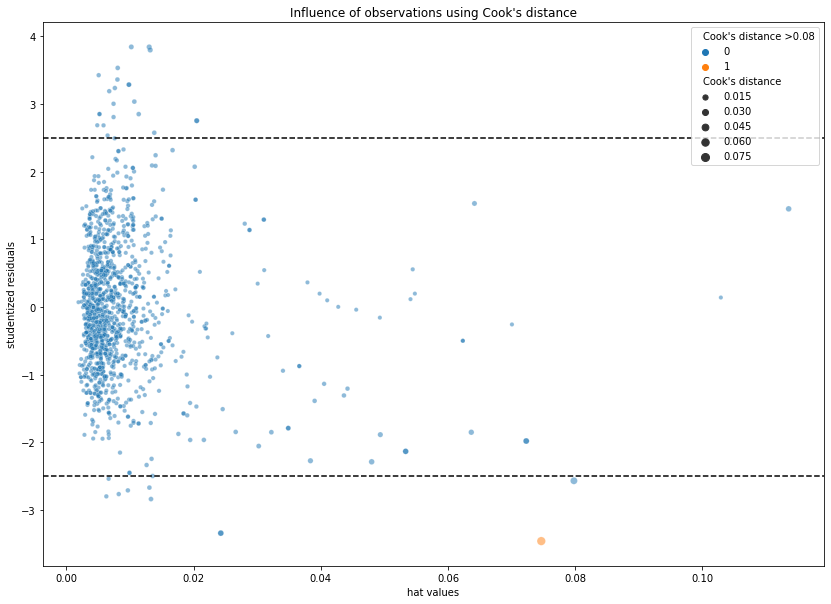

In [56]:
plt.figure(figsize=(14,10))

ax = sns.scatterplot(
    x=influence.hat_matrix_diag,
    y=influence.resid_studentized_internal,
    hue=high_influence,
    size=influence.cooks_distance[0],
    alpha=0.5
)

ax.axhline(-2.5, linestyle='--', color='black')
ax.axhline(2.5, linestyle='--', color='black')
ax.set_title("Influence of observations using Cook's distance")
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.show()

There is one data point that has a Cook's distance greater than 0.08, so let's remove it.

In [57]:
mask = influence.cooks_distance[0] > 0.08
outliers = influence.cooks_distance[0][mask]
train = train[~train.index.isin(outliers.index)]

In [58]:
lm = sm.OLS(
    train[outcome],
    sm.add_constant(train[significant_columns])
)
res = lm.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          5.87e-304
Time:                        11:35:14   Log-Likelihood:                -1163.9
No. Observations:                1278   AIC:                             2350.
Df Residuals:                    1267   BIC:                             2406.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 579.6154     14.738     39.327      0.000     550.701     608.529
fixed acidity           0.4950      0.022     22.390      0.000       0.452       0.538
volatile acidity        0.5507      0.122      4.523      0.000       0.312       0.790
citric acid             0.8619      0.147      5.868      0.000       0.574       1.150
residual sugar          0.2726      0.014     19.748      0.000       0.246       0.300
chlorides              -0.9773      0.424     -2.307      0.021      -1.808      -0.146
free sulfur dioxide    -0.0066      0.002     -3.865      0.000      -0.010      -0.003
density              -589.1619     15.096    -39.027      0.000    -618.778    -559.546
pH                      3.6348      0.166     21.959      0.000       3.310       3.960
sulphates               1.0505      0.114      9.248      0.000       0.828       1.273
quality                 0.3177      0.039      8.196      0.000       0.242       0.394
==============================================================================
Omnibus:                       53.362   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.411
Skew:                           0.374   Prob(JB):                     5.70e-18
Kurtosis:                       3.966   Cond. No.                     2.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that R^2 has slightly increased and AIC has slightly decreased.

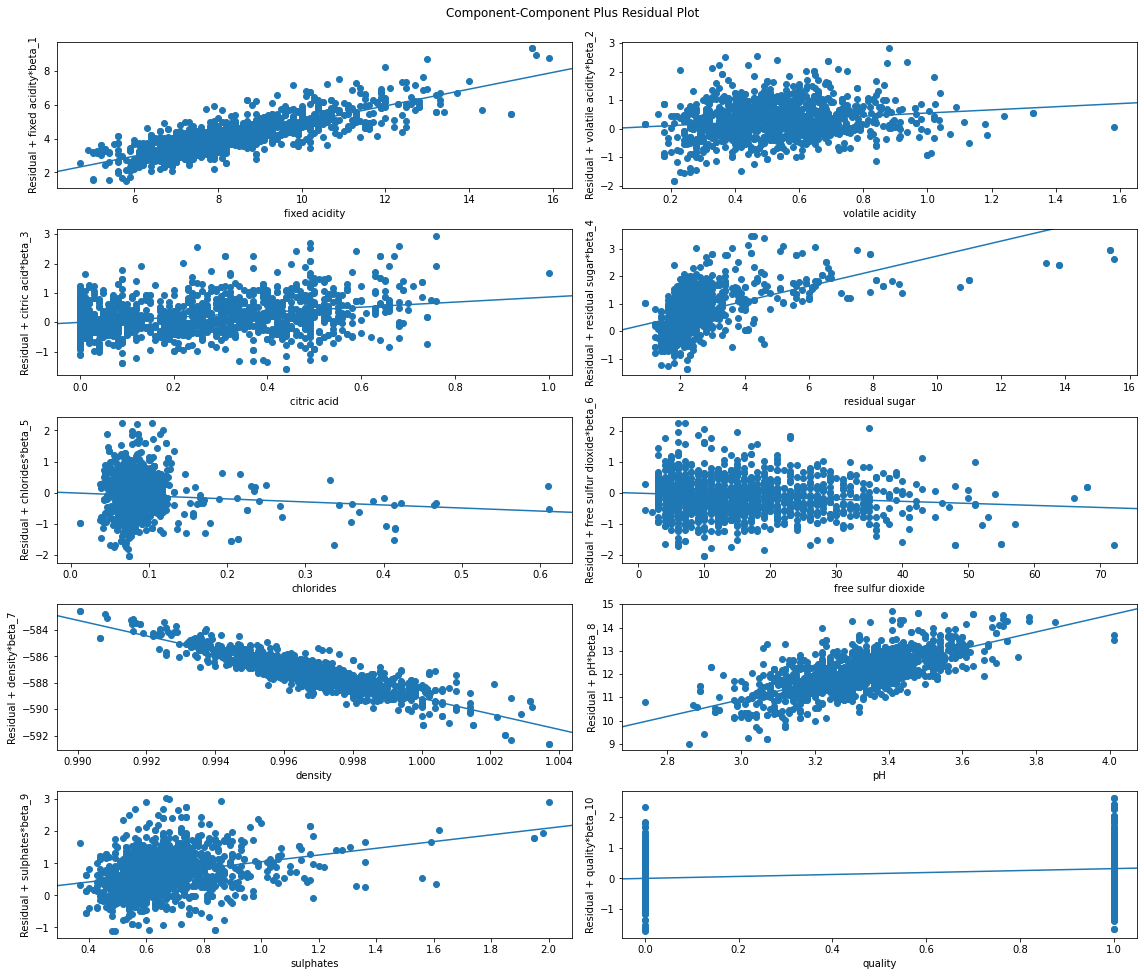

In [59]:
fig = plt.figure(figsize=(16, 16))
sm.graphics.plot_ccpr_grid(res, fig=fig)
plt.show()

From the partial residual plots we see if there are any non linear realationships between the outcome and predictor variables. We can try addind some squared terms like with 'residual sugar' and see if we get better results.

In [60]:
formula = "alcohol ~ Q('fixed acidity') + Q('volatile acidity') + Q('residual sugar')" +\
"+ Q('free sulfur dioxide') + density + sulphates + quality + I(Q('fixed acidity')**2)" +\
"+ I(Q('volatile acidity')**2) + I(Q('citric acid')**2) + I(Q('residual sugar')**2)" +\
"+ I(chlorides**2) + I(Q('free sulfur dioxide')**2) + I(Q('total sulfur dioxide')**2)" +\
"+ I(density**2) + I(pH**2) + I(sulphates**2) + I(quality**2)"

In [61]:
lm = smf.ols(
    formula=formula,
    data=train
)

res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:35:15   Log-Likelihood:                -1014.0
No. Observations:                1278   AIC:                             2064.
Df Residuals:                    1260   BIC:                             2157.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3.614e+04   3135.792     11.525      0.000       3e+04    4.23e+04
Q('fixed acidity')                    0.8306      0.080     10.352      0.000       0.673       0.988
Q('volatile acidity')                 1.9172      0.374      5.121      0.000       1.183       2.652
Q('residual sugar')                   0.6498      0.031     20.748      0.000       0.588       0.711
Q('free sulfur dioxide')             -0.0119      0.004     -2.639      0.008      -0.021      -0.003
density                           -7.194e+04   6294.564    -11.429      0.000   -8.43e+04   -5.96e+04
sulphates                             2.2474      0.365      6.156      0.000       1.531       2.964
quality                               0.1214      0.018      6.838      0.000       0.087       0.156
I(Q('fixed acidity') ** 2)           -0.0223      0.004     -5.466      0.000      -0.030      -0.014
I(Q('volatile acidity') ** 2)        -1.2135      0.288     -4.218      0.000      -1.778      -0.649
I(Q('citric acid') ** 2)              1.5322      0.206      7.428      0.000       1.128       1.937
I(Q('residual sugar') ** 2)          -0.0373      0.003    -14.613      0.000      -0.042      -0.032
I(chlorides ** 2)                    -3.1181      0.834     -3.741      0.000      -4.753      -1.483
I(Q('free sulfur dioxide') ** 2)      0.0002   9.09e-05      2.082      0.038    1.09e-05       0.000
I(Q('total sulfur dioxide') ** 2) -1.316e-05   3.65e-06     -3.609      0.000   -2.03e-05   -6.01e-06
I(density ** 2)                     3.58e+04   3158.737     11.332      0.000    2.96e+04     4.2e+04
I(pH ** 2)                            0.4809      0.025     19.252      0.000       0.432       0.530
I(sulphates ** 2)                    -0.6532      0.198     -3.307      0.001      -1.041      -0.266
I(quality ** 2)                       0.1214      0.018      6.838      0.000       0.087       0.156
==============================================================================
Omnibus:                       46.515   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.595
Skew:                           0.306   Prob(JB):                     3.84e-17
Kurtosis:                       4.022   Cond. No.                     6.42e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Again we can see that R^2 increased and AIC decreased. Also the insignificant variables have been removed.

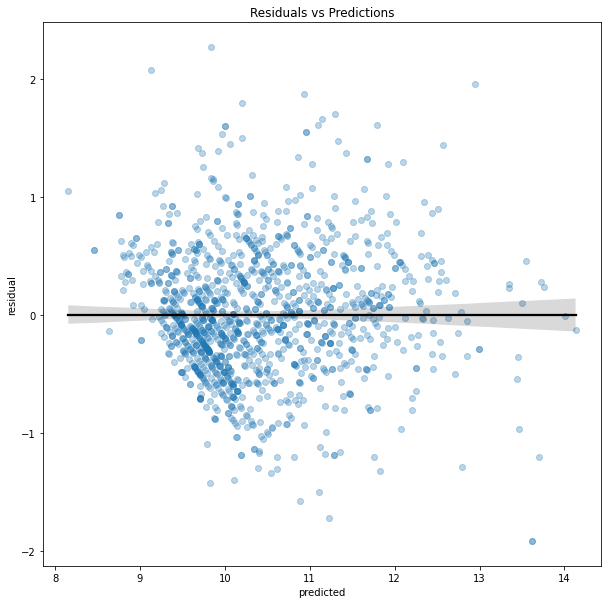

In [63]:
plt.subplots(figsize=(10,10))

ax = sns.regplot(
    x=res.fittedvalues,
    y=res.resid,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'black'},
    lowess=False
)

ax.set_title('Residuals vs Predictions')
ax.set_xlabel('predicted')
ax.set_ylabel('residual')

plt.show()

Here we see that there is more prediction uncertainty towards lower and higher values of alcohol.

#### Model evaluation

Let's now do cross-validation and evaluation on the test set.

In [64]:
significant_columns = [
    'fixed acidity','volatile acidity','citric acid','residual sugar',
    'chlorides','free sulfur dioxide','total sulfur dioxide','density',
    'pH','sulphates','quality','fixed acidity sq','volatile acidity sq',
    'citric acid sq','residual sugar sq','chlorides sq',
    'free sulfur dioxide sq','total sulfur dioxide sq','density sq',
    'pH sq','sulphates sq','quality sq'
]

In [65]:
X_train = train[significant_columns]
y_train = train[outcome]

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [66]:
scores = cross_validate(
    lin_reg_model,
    X_train,
    y_train,
    cv=6,
    scoring=(
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error'
      )
)

In [67]:
print(f"Cross-Validation R^2 - Mean: {scores['test_r2'].mean().round(3)}, \
Std. Deviation: {scores['test_r2'].std().round(3)}\n\
Cross-Validation MAE - Mean: {abs(scores['test_neg_mean_absolute_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_absolute_error'].std().round(3))}\n\
Cross-Validation MSE - Mean: {abs(scores['test_neg_mean_squared_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_squared_error'].std().round(3))}\n\
Cross-Validation RMSE - Mean: {abs(scores['test_neg_root_mean_squared_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_root_mean_squared_error'].std().round(3))}")

Cross-Validation R^2 - Mean: 0.723, Std. Deviation: 0.047
Cross-Validation MAE - Mean: 0.423, Std. Deviation: 0.023
Cross-Validation MSE - Mean: 0.305, Std. Deviation: 0.037
Cross-Validation RMSE - Mean: 0.551, Std. Deviation: 0.034


Metrics computed across validation steps doesn't seem to differ very much.

In [68]:
y_pred = lin_reg_model.predict(test[significant_columns])

r2 = r2_score(test[outcome], y_pred)
mae = mean_absolute_error(test[outcome], y_pred)
mse = mean_squared_error(test[outcome], y_pred)
rmse = mean_squared_error(test[outcome], y_pred, squared=False)

print(f"Test R^2: {r2.round(3)}\n\
Test MAE: {mae.round(3)}\n\
Test MSE: {mse.round(3)}\n\
Test RMSE: {rmse.round(3)}")

Test R^2: 0.759
Test MAE: 0.408
Test MSE: 0.283
Test RMSE: 0.532


Using the test set it seems we get even lower R^2, MAE, MSE and RMSE which indicates there is no overfitting.

## Summary

Here are the main things learned from this dataset:
- 'residual sugar' and 'chlorides' have the most outliers;
- The distributions across variables of good and bad wine are similar, but there are linearly separable variable combinations;
- Red wine with higher alcohol concentration seems to have higher quality rating;
- Testing the quality prediction on the test set we got precision=0.75, recall=0.75, f1-score=0.75 and AUC=0.754;
- Judging by the computed coefficients, from the last model, sulphates and chlorides (squared) have the strongest ralation when predicting red wine quality;
- Testing the alcohol prediction on the test set we got R^2=0.759, MAE=0.408, MSE=0.283 and RMSE=0.532;
- Judging by the computed coefficients, from the last model, density, total sulfur dioxide (squared) and density (squared) have the strongest ralation when predicting red wine alcohol concentration;

## Suggestions for improvement

- Some domain knowledge would be useful in this case. Maybe it could have been provided in the Kaggle dataset description. It would be interesting to know which variables actualy contribute the most to the quality of the wine.